# Tools preparation

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [2]:
# load the data 
df=pd.read_csv("stroke_data.csv")
df

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66.788137,Male,Medium,1,0,25.842521,96.428681,1,Current,1
1,86.393609,Female,Medium,1,1,32.531061,133.350068,0,Never,1
2,76.158579,Female,Medium,1,0,40.681244,111.489589,0,Never,0
3,72.477870,Female,Low,0,1,33.003193,125.692465,0,Former,0
4,59.881635,Male,Low,0,0,26.062443,123.218486,1,Never,1
...,...,...,...,...,...,...,...,...,...,...
9995,80.647182,Female,Medium,1,1,28.283629,128.639802,0,Former,1
9996,82.607321,Female,Medium,1,1,31.148301,105.025226,1,Current,1
9997,86.020702,Female,High,1,1,32.641037,147.174095,0,Never,1
9998,67.387542,Female,Medium,0,1,29.946547,112.480515,0,Former,0


In [3]:
df.isna().sum()

Age               0
Gender            0
SES               0
Hypertension      0
Heart_Disease     0
BMI               0
Avg_Glucose       0
Diabetes          0
Smoking_Status    0
Stroke            0
dtype: int64

In [4]:
print(df.duplicated().sum())

0


In [5]:
df.describe()

,Age,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Stroke
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,69.757847,0.605800,0.302800,28.042252,109.115918,0.196000,0.297800
std,9.869468,0.488703,0.459492,4.901424,16.421142,0.396988,0.457314
min,27.706561,0.000000,0.000000,15.037988,45.569135,0.000000,0.000000
25%,63.128574,0.000000,0.000000,24.660786,98.188349,0.000000,0.000000
50%,69.796042,1.000000,0.000000,28.066932,109.022208,0.000000,0.000000
75%,76.402885,1.000000,1.000000,31.390170,120.341179,0.000000,1.000000
max,99.417448,1.000000,1.000000,47.495955,176.180688,1.000000,1.000000


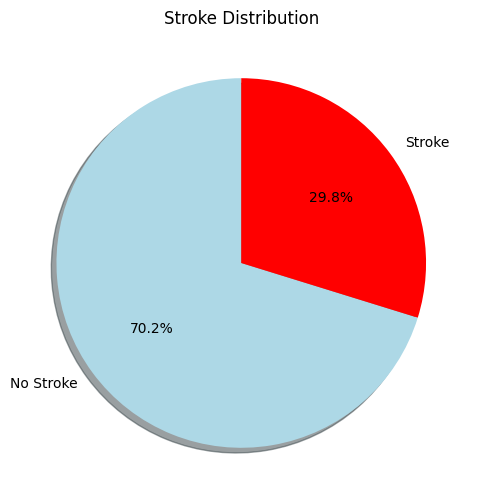

In [6]:


stroke_counts=df['Stroke'].value_counts()
labels=["No Stroke","Stroke"]
colors=["lightblue","red"]
plt.figure(figsize=(6,6))
plt.pie(stroke_counts,labels=labels,
       autopct='%1.1f%%',colors=colors,
       startangle=90,shadow=True)
plt.title("Stroke Distribution");



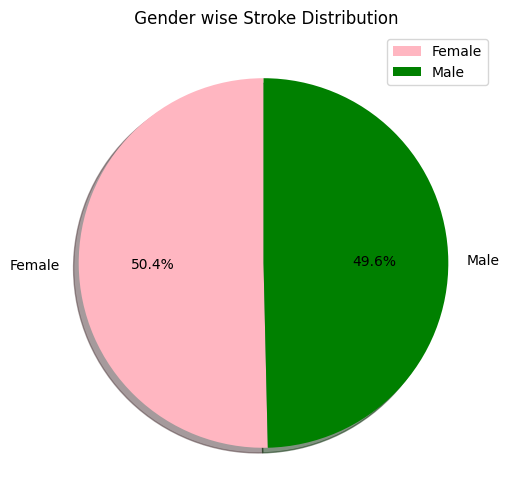

In [7]:
stroke_counts=df['Gender'].value_counts()
labels=["Female","Male"]
colors=["lightPink","green"]
plt.figure(figsize=(6,6))
plt.pie(stroke_counts,labels=labels,
       autopct='%1.1f%%',colors=colors,
       startangle=90,shadow=True)
plt.title(" Gender wise Stroke Distribution")
plt.legend(["Female","Male"]);

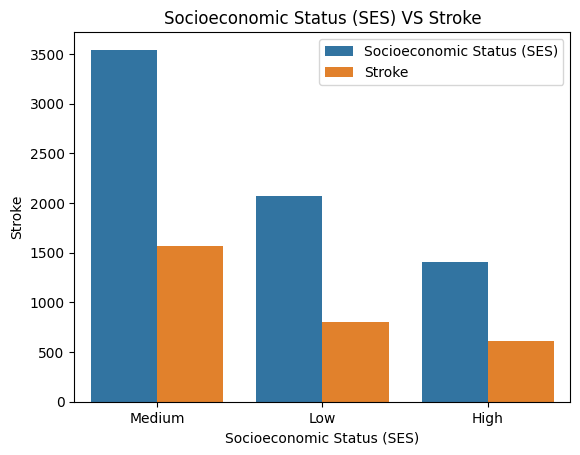

In [8]:
sns.countplot(x='SES',hue='Stroke',data=df)
plt.title("Socioeconomic Status (SES) VS Stroke")
plt.xlabel("Socioeconomic Status (SES)")
plt.ylabel("Stroke")
plt.legend(["Socioeconomic Status (SES)","Stroke"]);

In [9]:
df.isnull().sum()

Age               0
Gender            0
SES               0
Hypertension      0
Heart_Disease     0
BMI               0
Avg_Glucose       0
Diabetes          0
Smoking_Status    0
Stroke            0
dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Female    5037
Male      4963
Name: count, dtype: int64

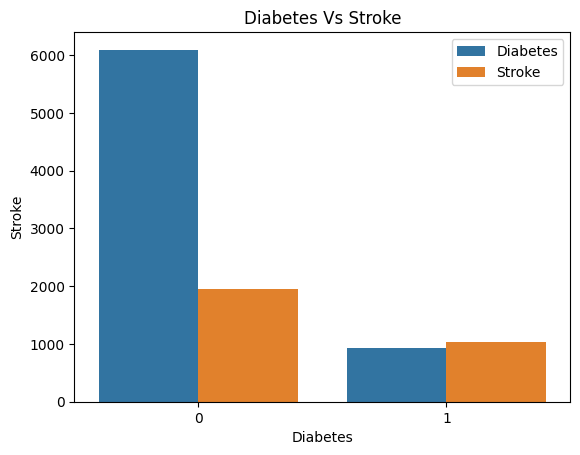

In [11]:

sns.countplot(x='Diabetes',hue='Stroke',data=df)
plt.xticks(rotation=0);
plt.title("Diabetes Vs Stroke")
plt.xlabel("Diabetes")
plt.ylabel("Stroke")
plt.legend(["Diabetes","Stroke"]);

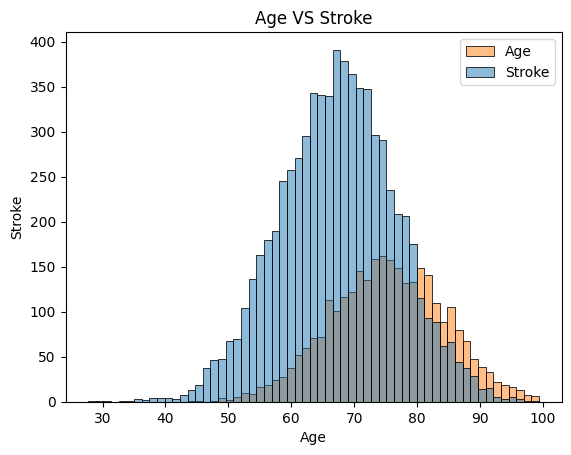

In [12]:
sns.histplot(x="Age",hue='Stroke',data=df)
plt.title("Age VS Stroke")
plt.xlabel("Age")
plt.ylabel('Stroke')
plt.legend(['Age','Stroke']);

In [13]:
df['SES'].value_counts()
le=LabelEncoder()
df['SES']=le.fit_transform(df['SES'])
df['SES'].unique()


array([2, 1, 0])

In [14]:
le=LabelEncoder()
df['Smoking_Status']=le.fit_transform(df['Smoking_Status'])
df['Smoking_Status'].unique()

array([0, 2, 1])

In [15]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df['Gender']

0       1
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             10000 non-null  float64
 1   Gender          10000 non-null  int64  
 2   SES             10000 non-null  int64  
 3   Hypertension    10000 non-null  int64  
 4   Heart_Disease   10000 non-null  int64  
 5   BMI             10000 non-null  float64
 6   Avg_Glucose     10000 non-null  float64
 7   Diabetes        10000 non-null  int64  
 8   Smoking_Status  10000 non-null  int64  
 9   Stroke          10000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 781.4 KB


In [17]:
df.corr()

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
Age,1.000000,0.007080,0.009281,0.417468,0.109534,-0.001319,0.138313,0.132659,-0.005451,0.362514
Gender,0.007080,1.000000,0.006209,0.011629,-0.008182,-0.003549,0.006903,-0.008942,-0.022601,0.004819
SES,0.009281,0.006209,1.000000,0.003885,0.002428,0.000433,0.020656,-0.012520,-0.005457,0.008117
Hypertension,0.417468,0.011629,0.003885,1.000000,0.051501,-0.003692,0.308235,0.058061,-0.009126,0.388837
Heart_Disease,0.109534,-0.008182,0.002428,0.051501,1.000000,-0.002336,0.297635,0.022211,0.004160,0.274265
BMI,-0.001319,-0.003549,0.000433,-0.003692,-0.002336,1.000000,0.005738,-0.003925,0.006270,0.083252
Avg_Glucose,0.138313,0.006903,0.020656,0.308235,0.297635,0.005738,1.000000,0.009723,-0.006794,0.220624
Diabetes,0.132659,-0.008942,-0.012520,0.058061,0.022211,-0.003925,0.009723,1.000000,-0.013199,0.248065
Smoking_Status,-0.005451,-0.022601,-0.005457,-0.009126,0.004160,0.006270,-0.006794,-0.013199,1.000000,-0.062964
Stroke,0.362514,0.004819,0.008117,0.388837,0.274265,0.083252,0.220624,0.248065,-0.062964,1.000000


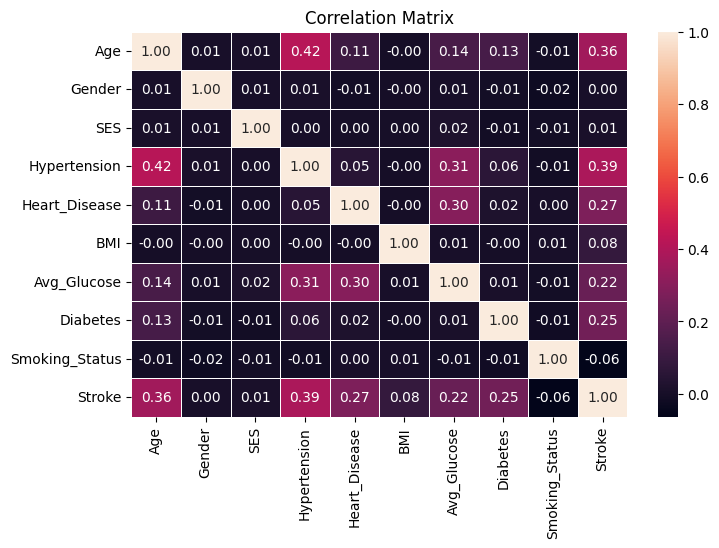

In [18]:
corr_map=df.corr()
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(corr_map,annot=True,
           linewidths=0.5,
           fmt='0.2f',
           ax=ax)
plt.title("Correlation Matrix");


In [19]:
# separate the data 
X=df.drop("Stroke",axis=1)
Y=df["Stroke"]
#split the data into test and train 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
X.dtypes

Age               float64
Gender              int64
SES                 int64
Hypertension        int64
Heart_Disease       int64
BMI               float64
Avg_Glucose       float64
Diabetes            int64
Smoking_Status      int64
dtype: object

In [21]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8000, 9) (8000,)
(2000, 9) (2000,)


In [175]:
# imbalance data
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_resampled,Y_train_resampled=smote.fit_resample(X_train,Y_train)
clf.fit(X_train_resampled,Y_train_resampled);

In [176]:
from collections import Counter 
print("Before Smote",Counter(Y_train))
print("Before Smote",Counter(Y_train_resampled))

Before Smote Counter({0: 5609, 1: 2391})
Before Smote Counter({1: 5609, 0: 5609})


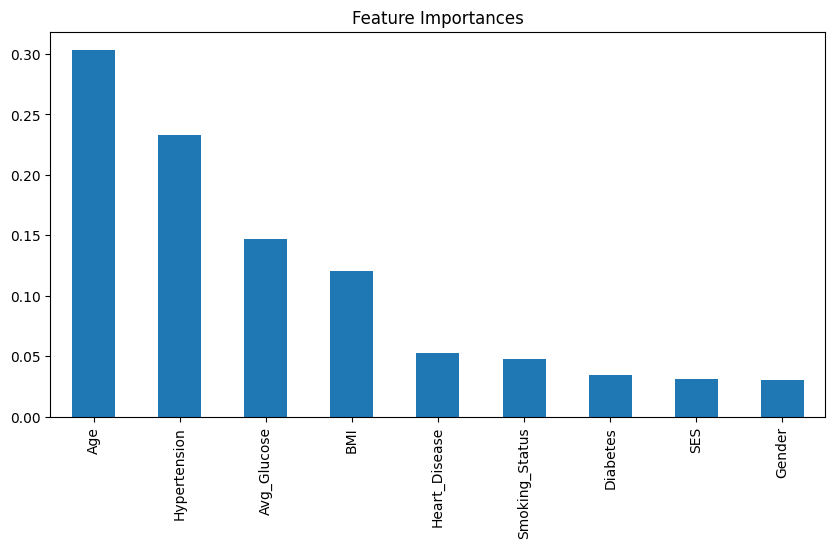

In [177]:


feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importances")
plt.show()


In [178]:
from sklearn.ensemble import GradientBoostingClassifier


gb_clf = GradientBoostingClassifier( random_state=42)

# Train model
gb_clf.fit(X_train_resampled, Y_train_resampled)

# Test model
y_pred_gb = gb_clf.predict(X_test)

# Evaluate model
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1413
           1       0.53      0.74      0.62       587

    accuracy                           0.73      2000
   macro avg       0.70      0.73      0.70      2000
weighted avg       0.77      0.73      0.74      2000



In [180]:
gb_clf = GradientBoostingClassifier(
    n_estimators=200,  # More trees
    learning_rate=0.05,  # Balanced learning rate
    max_depth=5,  # Prevent overfitting
    subsample=0.7,  # Improve generalization
    min_samples_split=5, 
    min_samples_leaf=10,# Reduce noise
    random_state=42
)

gb_clf.fit(X_train_resampled, Y_train_resampled)
y_pred_gb = gb_clf.predict(X_test)

print(classification_report(Y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1413
           1       0.52      0.70      0.60       587

    accuracy                           0.72      2000
   macro avg       0.69      0.72      0.69      2000
weighted avg       0.76      0.72      0.73      2000



In [181]:
y_pred_gb=gb_clf.predict_proba(X_test)[:,1]
threshold=0.5
y_pred_adj=(y_pred_gb>=threshold).astype(int)
# print the classification 
print(classification_report(Y_test,y_pred_adj))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1413
           1       0.52      0.70      0.60       587

    accuracy                           0.72      2000
   macro avg       0.69      0.72      0.69      2000
weighted avg       0.76      0.72      0.73      2000



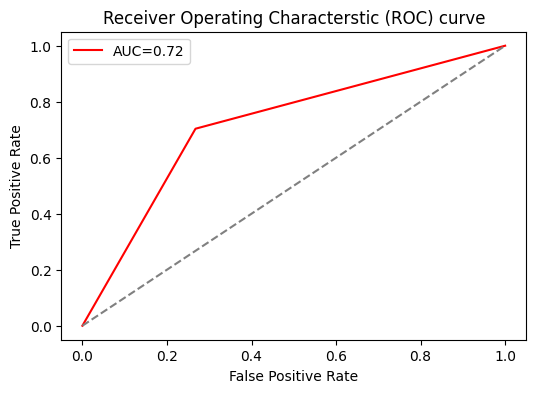

In [182]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_adj)
auc_score=roc_auc_score(Y_test,y_pred_adj)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="red",label=f'AUC={auc_score:.2f}')
plt.plot([0,1],[0,1],linestyle="--",color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstic (ROC) curve")
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix')

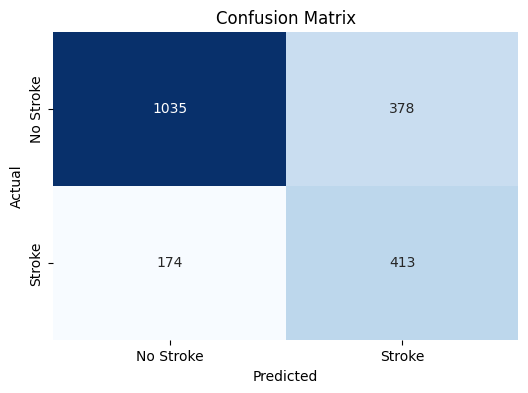

In [183]:
# plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test,y_pred_adj), annot=True,fmt='d',cmap='Blues',cbar=False,
           xticklabels=["No Stroke","Stroke"],yticklabels=["No Stroke","Stroke"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")


In [187]:
joblib.dump(gb_clf,"Gradient boosting Stroke Model.pkl")

['Gradient boosting Stroke Model.pkl']